# Importing the required libraries

In [ ]:
import matplotlib.pyplot as plt
from numpy import dot, sum, tile, linalg 
from numpy.linalg import inv,det 
import numpy as np
from numpy import * 
from numpy.linalg import inv  
from numpy.random import randn

# Defining the class for kalman filter.
## Kalman Filter worka as:
###Prediction
###Xk = Ak-1 * Xk-1 + Bk * Uk
###Pk = Ak-1 * Pk-1 * ATk-1 + Qk-1
###Updation
###Vk = Yk - H * Xk
###Sk = Hk * Pk * HTk + Rk
###Kk = Pk * HTk  * S-1k
###Xk = Xk + Kk * Vk
###Pk = Pk - Kk * Sk * KTk


In [ ]:
# defining the class for kalman filter functions
class kalman_filter:
  # defining the predict function
  def predict_state(self, x, p, a, q, b, u): 
    # x = A*X + B*U    
    x = dot(a, x) + dot(b, u)    
    # P = A * P * At + Q 
    p = dot(a, dot(p, a.T)) + q  
    # returning the values of X and P  
    return(x,p)

  # defining the function for updates
  def update_state(self, x, p, y, h, r):   
    # MEASUREMENT = H * X  
    m = dot(h, x)
    # S = H * P * HT + R    
    s = r + dot(h, dot(p, h.T)) 
    # Kalman Matrix K = P * HT * S-1
    k = dot(p, dot(h.T, inv(s)))    
    # Next state X = X + K * Y - measurement 
    x = x + dot(k, (y-m)) 
    # P = P - K * S * KT    
    p = p - dot(k, dot(s, k.T))    
    print("Kalman Gain Matrix K is:\n",k,'\n')    
    return (x,p,k,m,s)  

# Defining the function for taking the Input and Plotting the result.

In [ ]:
# taking the input
def input_data():
  #time step of movement 
  dt = float(input("Enter time step:\n"))  
  # Initialization of state matrices 
  X = array([[1], [3], [5], [3]])
  P = diag((0.1, 0.2, 0.3, 0.3)) 
  A = array([[1, 0, dt , 0], [0, 1, 0, dt], [0, 0, 1, 0], [0, 0, 0, 1]])
  c = int(input("Enter Value of c:\n")) 
  Q = c * eye(X.shape[0]) 
  B = eye(X.shape[0]) 
  U = [[0.11],[0.010],[2.001],[0.109]] 
  # Measurement matrices 
  Y = array([[X[0,0] + abs(randn(1)[0])],[X[1,0] + abs(randn(1)[0])], [X[2,0] +  abs(randn(1)[0])],[X[3,0] + abs(randn(1)[0])]])
  H = array([[1, 0, 0, 0], [0, 1, 0, 0],[0, 0, 1, 0],[0, 0, 0, 1]])
  d = int(input("Enter Value of d:\n")) 
  R = d * eye(Y.shape[0])  
  # Number of iterations in Kalman Filter 
  N = int(input("Enter number of Iterations/steps:\n"))
  return X,P,A,Q,B,U,Y,H,R,N

# printing the input
def print_state_variables(X,P,A,Q,B,U,Y,H,R,N):
  print("Mean State Matrix of previous step is:\n",X,'\n')
  print("State Covariance of previous step is:\n",P,'\n')
  #print("Transition n*n matrix is:\n",A,'\n')
  #print("Process Noise covariance matrix is:\n",Q,'\n')
  #print("Measurement Vector Y:\n",Y,'\n')
  #print("Measurement Matrix H:\n",H,'\n')
  

# plotting the result without any measurement actual and predicted
def plt_kf(n,m1,m2):
  fig = plt.figure(dpi=150)
  fig.suptitle('Example of Kalman filter', fontsize=20)
  plt.plot(n,m1, label='Measurements', color='r',linewidth=0.5)
  plt.plot(n,m2, label='Real Track', color='b', linewidth=0.5)
  plt.xlabel('X values', fontsize=20)
  plt.ylabel('Y values', fontsize=20)
  plt.legend()
  plt.show()

# plotting the result with actual, predicted, and measurement
def plot_kf_m(t,m,real_track,p):
  fig = plt.figure(dpi=100)
  fig.suptitle('Example of Kalman filter for tracking a moving object', fontsize=20)
  plt.plot(t, m, label='Measurements', color='g',linewidth=0.5)
  plt.plot(t, real_track, label='Real Track', color='b', linewidth=1.5)
  plt.plot(t, p, label='Kalman Filter Prediction', color='r', linewidth=1.5)
  plt.xlabel('Time', fontsize=20)
  plt.ylabel('Position', fontsize=20)
  plt.legend()
  plt.show()

# Example of kalman filter for 2D data using random measurment

In [ ]:
# taking the data
X,P,A,Q,B,U,Y,H,R,N = input_data()
# pritning the state variables
print_state_variables(X,P,A,Q,B,U,Y,H,R,N)
# Applying the Kalman Filter 
kf = kalman_filter()
m1 = []
m2 = []
n = []
# for n iterations
for i in arange(0, N):
  print("For iteration:",i,"\n")
  # storing the values of measurements and predictions
  m1.append(X)
  m2.append(Y)
  n.append(i)
  # predicting next state
  (X, P) = kf.predict_state(X, P, A, Q, B, U)   
  # updating
  (X, P, K, M, S) = kf.update_state(X, P, Y, H, R)
  # changing the value of y randomly  
  if i < N/2: 
    Y = array([[X[0,0] + abs(randn(2)[0])],[X[1,0] + abs(randn(1)[0])], [X[2,0] + abs(randn(3)[0])],[X[3,0] + abs(randn(1)[0])]])
  else:
    Y = array([[X[0,0] - abs(randn(2)[0])],[X[1,0] + abs(randn(1)[0])], [X[2,0] + abs(randn(3)[0])],[X[3,0] + abs(randn(1)[0])]])
  print_state_variables(X,P,A,Q,B,U,Y,H,R,N)

Enter time step:
0.65
Enter Value of c:
33
Enter Value of d:
77
Enter number of Iterations/steps:
100
Mean State Matrix of previous step is:
 [[1]
 [3]
 [5]
 [3]] 

State Covariance of previous step is:
 [[0.1 0.  0.  0. ]
 [0.  0.2 0.  0. ]
 [0.  0.  0.3 0. ]
 [0.  0.  0.  0.3]] 

For iteration: 0 

Kalman Gain Matrix K is:
 [[0.3014378  0.         0.00123499 0.        ]
 [0.         0.30207098 0.         0.00123387]
 [0.00123499 0.         0.30190172 0.        ]
 [0.         0.00123387 0.         0.30190172]] 

Mean State Matrix of previous step is:
 [[3.46039748]
 [4.6823384 ]
 [6.75038773]
 [3.11773136]] 

State Covariance of previous step is:
 [[23.21071071  0.          0.09509439  0.        ]
 [ 0.         23.25946539  0.          0.0950082 ]
 [ 0.09509439  0.         23.24643206  0.        ]
 [ 0.          0.0950082   0.         23.24643222]] 

For iteration: 1 

Kalman Gain Matrix K is:
 [[0.4555257  0.         0.06213211 0.        ]
 [0.         0.45571299 0.         0.0621103

In [ ]:
# getting values of measurement and the prediction
#print(m1[0].shape)
#print(m2[0].shape)
a = []
b = [] 
for i in range(len(m1)):
  a.append(m1[i][0])
  b.append(m2[i][0])
print("Values of Measurements are:\n",a)
print("Values of Predictions are:\n",b)

Values of Measurements are:
 [array([1]), array([3.46039748]), array([5.87131697]), array([8.42044905]), array([11.10229916]), array([14.08695898]), array([17.89344533]), array([21.21508261]), array([24.69688501]), array([28.72491809]), array([33.68291563]), array([38.74790318]), array([44.20758751]), array([49.28750275]), array([55.09121725]), array([60.70241544]), array([66.35429062]), array([71.92014391]), array([77.81282227]), array([83.94621331]), array([90.72217391]), array([96.92351687]), array([104.03160348]), array([110.63677533]), array([118.27258761]), array([125.29972055]), array([132.4912837]), array([139.73324957]), array([147.15790926]), array([154.43031072]), array([161.97769689]), array([169.877526]), array([177.13215567]), array([184.24605112]), array([192.20824239]), array([199.78863007]), array([207.47436919]), array([215.09662399]), array([222.35140424]), array([229.53318193]), array([237.31985623]), array([244.6098688]), array([252.06465134]), array([259.22734606]

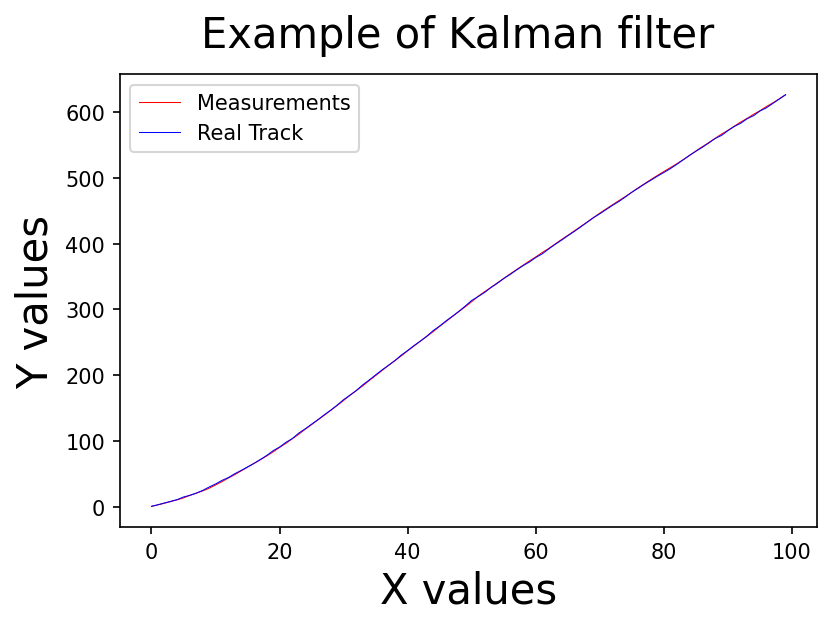

In [ ]:
# plotting the result
plt_kf(n,a,b)

# Example of 1D tracking using a defined equation.
## Defining the data variables

In [ ]:
# number of iterations
N = int(input("Enter number of Iterations/steps:\n"))
# time step
dt = 0.7
# getting value of time for n time steps
t = np.arange(0, N, dt)
# getting the point on the real track
real_track = 0.45*(10*t-t**2)
# value of u = 20
U = 20
# value of other variables
std_acc = 0.25
std_meas = 0.10
A = np.matrix([[1, dt],[0, 1]])
B = np.matrix([[(dt**2)/2], [dt]]) 
H = np.matrix([[1,0]])
Q = np.matrix([[(dt**4)/4, (dt**3)/2],[(dt**3)/2, dt**2]]) * std_acc**2
R = std_meas**2
P = np.eye(A.shape[1])
X = np.matrix([[0],[0]])
Y = []
print_state_variables(X,P,A,Q,B,U,Y,H,R,N)

Enter number of Iterations/steps:
65
Mean State Matrix of previous step is:
 [[0]
 [0]] 

State Covariance of previous step is:
 [[1. 0.]
 [0. 1.]] 



## Using kalman filter for predicting the state in this a measurement was taken very close to the actual value and then the predicton was done using the measurement.

In [ ]:
# creating class object
kf = kalman_filter()
m = []
p = []
for x in real_track:
    # Mesurement
    Y = H * x + np.random.normal(0,15)
    # storing value of measurements using real trrack 
    m.append(float(Y.item(0)))
    # predicting the next state
    (X, P) = kf.predict_state(X, P, A, Q, B, U) 
    # storing the value of predictions
    p.append(X[0].item(0))
    # update the state
    (X, P, K, M, S) = kf.update_state(X, P, Y.item(0), H, R)
    # printing state variables
    print_state_variables(X,P,A,Q,B,U,Y,H,R,N)

Kalman Gain Matrix K is:
 [[0.99334997]
 [0.47263043]] 

Mean State Matrix of previous step is:
 [[ 1.4289782 ]
 [12.34850698]] 

State Covariance of previous step is:
 [[0.0099335  0.0047263 ]
 [0.0047263  0.69471769]] 

Kalman Gain Matrix K is:
 [[0.973025  ]
 [1.35346396]] 

Mean State Matrix of previous step is:
 [[-10.98585984]
 [ -9.75980555]] 

State Covariance of previous step is:
 [[0.00973025 0.01353464]
 [0.01353464 0.04624562]] 

Kalman Gain Matrix K is:
 [[0.84636813]
 [0.86994542]] 

Mean State Matrix of previous step is:
 [[23.95236669]
 [42.13737553]] 

State Covariance of previous step is:
 [[0.00846368 0.00869945]
 [0.00869945 0.02760968]] 

Kalman Gain Matrix K is:
 [[0.79133289]
 [0.80848026]] 

Mean State Matrix of previous step is:
 [[13.97005741]
 [10.79726783]] 

State Covariance of previous step is:
 [[0.00791333 0.0080848 ]
 [0.0080848  0.02691013]] 

Kalman Gain Matrix K is:
 [[0.78340716]
 [0.81526936]] 

Mean State Matrix of previous step is:
 [[23.21216868

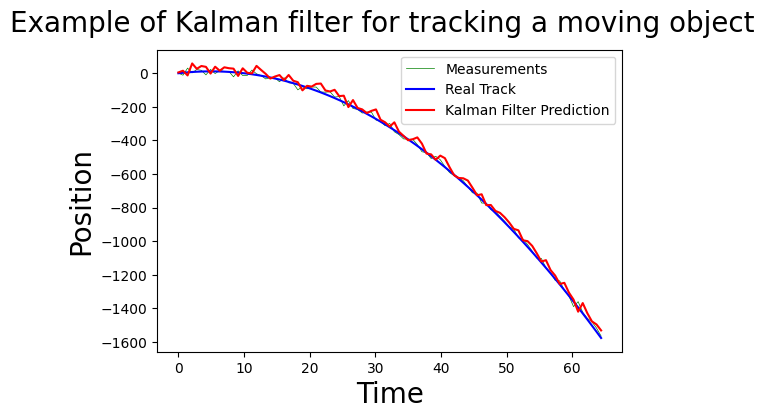

In [ ]:
# plotting the result of prediction
plot_kf_m(t,m,real_track,p)

# Example with 2D data projectile motion
## Assuming the trajectory to be y = root( 5000^2 - (i-5000)^2 ) 

In [ ]:
# using open cv2 to draw on image
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
# Reading the Image 
img = cv2.imread("img.jpg")

## Defining the Variables used for 2D kalman filter

In [ ]:
# defining the values of A, H, Q, R etc.
dt = 0.23
U = np.matrix([[1],[10]])
std_acc = 1
std_means_x = 0.12
std_means_y = 0.15
A = np.matrix([[1, 0, dt, 0],[0, 1, 0, dt],[0, 0, 1, 0],[1, 0, 0, 0]])
B = np.matrix([[(dt**2)/2,0], [0,(dt**2)/2], [dt, 0], [0, dt] ]) 
H = np.matrix([[1,0,0,0],[0,1,0,0]])
Q = np.matrix([[(dt**4)/4,0, (dt**3)/2,0],[0,(dt**4)/4,0, (dt**3)/2],[(dt**3)/2,0, dt**2,0],[0,(dt**3)/2,0,dt**2]]) * std_acc**2
R = np.matrix([[std_means_x**2,0],[0,std_means_y**2]])
P = np.eye(A.shape[1])
X = np.matrix([[1],[2],[3],[1]])
Y = [[0],[0],[0],[0]]

In [ ]:
# generating the values on real track 
from numpy.random.mtrand import randint
a = []
b = []
for i in range(1,5000,10):
  a.append(i)
  b.append(int(np.sqrt(5000**2 - (i-5000)**2 )))
for i in range(len(a)):
  if i < len(a)/2:
    a[i] = a[i] - 100
    b[i] = b[i] - 1000
  else:
    a[i] = a[i] + 100
    b[i] = b[i] - 1000 

RED colour Projectile's real path



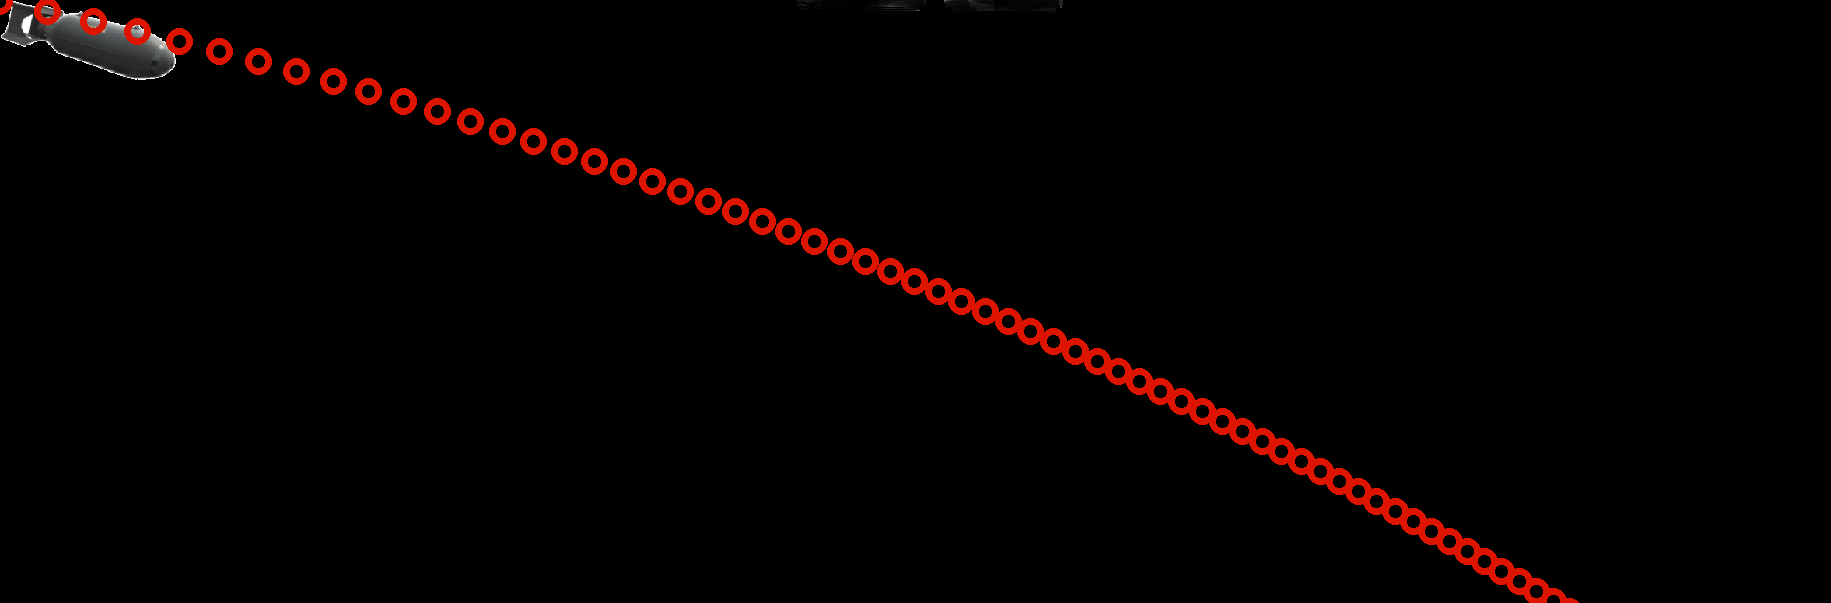

In [ ]:
# plotting the  points on the image
for i in range(len(a)):
  cv2.circle(img,(b[i],a[i]), 10, (0, 20, 220), 5)
# showing result
print("RED colour Projectile's real path\n")
cv2_imshow(img)

In [ ]:
# using kalman filter
kf = kalman_filter()
p = []
for i in range(len(a)):
  Y = [a[i],b[i]]
  # presicting the next state
  (X, P) = kf.predict_state(X, P, A, Q, B, U) 
  p.append(X)
  # updating the state
  (X, P, K, M, S) = kf.update_state(X, P, Y, H, R)
# plotting the predictions
pre = []
for i in range(1,len(p)):
  pre.append(array(p[i][0]))
for i in range(len(pre)):
  cv2.circle(img,(int(pre[i][0][1]),int(pre[i][0][0])), 5, (20, 220, 0), 5)

Kalman Gain Matrix K is:
 [[0.98651685 0.        ]
 [0.         0.97909115]
 [0.22105205 0.        ]
 [0.93632994 0.00565329]] 

Kalman Gain Matrix K is:
 [[ 0.82497184 -0.02922963]
 [-0.04567129  0.55507555]
 [ 2.80701543 -0.51936566]
 [ 0.20021028  0.21194224]] 

Kalman Gain Matrix K is:
 [[ 0.77454697 -0.0245309 ]
 [-0.03832953  0.44932986]
 [ 1.9736656  -0.25889904]
 [ 0.34192063  0.18509664]] 

Kalman Gain Matrix K is:
 [[ 0.69521303 -0.00597145]
 [-0.00933039  0.41095785]
 [ 1.45805288 -0.12267122]
 [ 0.37719122  0.18179695]] 

Kalman Gain Matrix K is:
 [[ 0.64116641  0.00637174]
 [ 0.00995584  0.3965917 ]
 [ 1.25779005 -0.07509075]
 [ 0.36661625  0.18648125]] 

Kalman Gain Matrix K is:
 [[ 0.61535877  0.01164519]
 [ 0.01819561  0.39170519]
 [ 1.20544052 -0.06429691]
 [ 0.35187498  0.19033712]] 

Kalman Gain Matrix K is:
 [[ 0.60689713  0.01302064]
 [ 0.02034476  0.39032025]
 [ 1.20173287 -0.06377563]
 [ 0.34409612  0.19190031]] 

Kalman Gain Matrix K is:
 [[ 0.60530234  0.013137

RED colour Projectile's real path

GREEN colour Projectile's predicted path



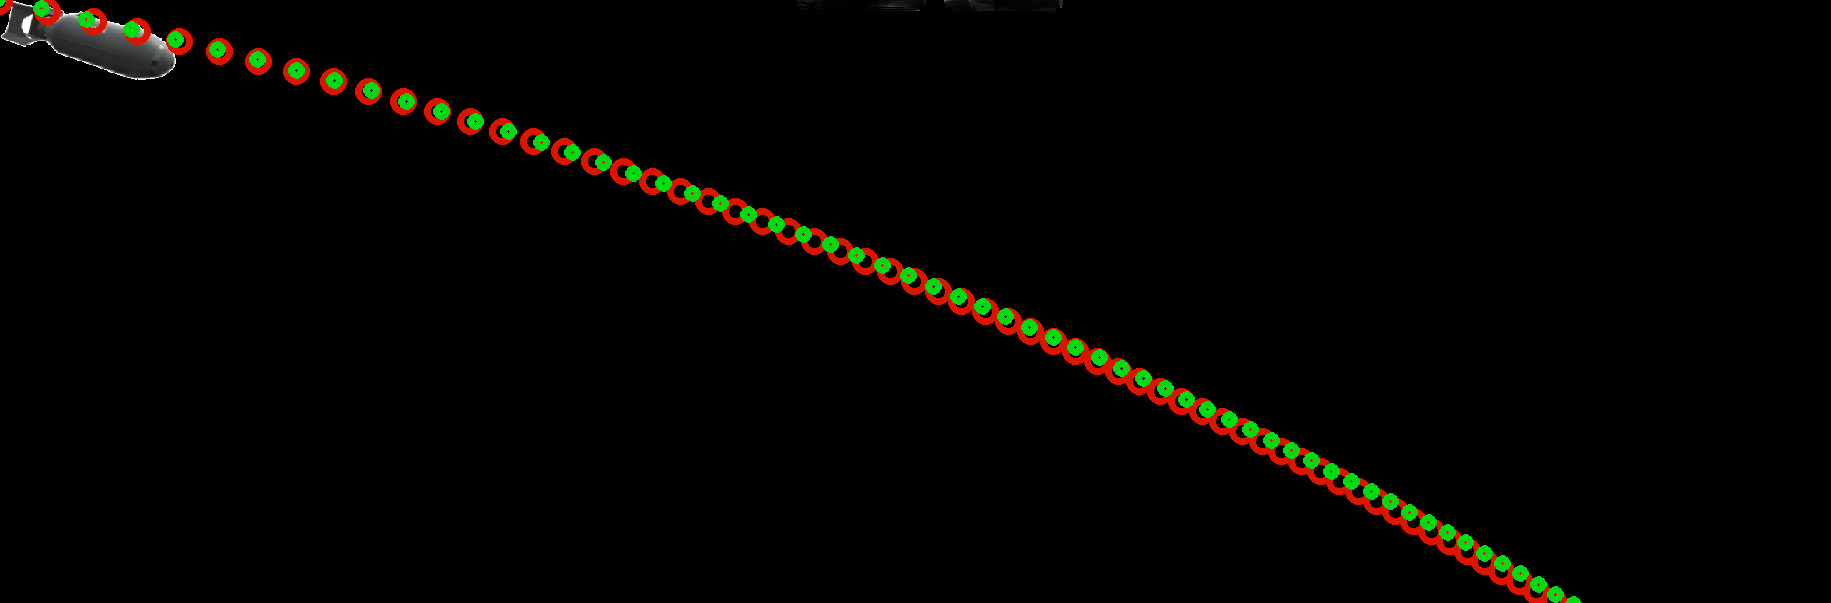

In [ ]:
# showing result
print("RED colour Projectile's real path\n")
print("GREEN colour Projectile's predicted path\n")
cv2_imshow(img)